In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/ricardormotta/projects/tcc/real-estate-pricing/data/01_raw/raw_data.csv", sep="|")

In [3]:
df.shape

(9827102, 17)

In [4]:
df.head()

,endereco,numero_char,shp_municipio,shp_bairro_distrito,shp_microarea,tipo_transacao,tipo_imovel,area_util,dormitorios,suites,banheiros,vagas,area_total,ano_construcao,salas,preco_imovel_mediana,Mes
0,RUA VERGUEIRO,266,São Paulo,Liberdade,Liberdade,VENDA,APARTAMENTO,76.0,2,1,2,1.0,76.0,1975.0,2.0,930000.0,9.0
1,RUA DIOGO PEREIRA,297,São Paulo,Vl Sonia,Portal do Morumbi,VENDA,APARTAMENTO,65.0,2,1,1,2.0,65.0,1995.0,2.0,320000.0,12.0
2,RUA POUSADA DE SARAMAGOS,25,São Paulo,Cachoeirinha,Basileia,VENDA,CASA,125.0,3,1,2,2.0,125.0,2006.0,3.0,695000.0,3.0
3,RUA MARTIM FRANCISCO,334,São Paulo,Santa Cecília,Campos Elíseos,LOCACAO,APARTAMENTO,32.0,1,0,1,NaN,32.0,1968.0,1.0,1300.0,6.0
4,ALAMEDA TIETE,588,São Paulo,Jd Paulista,Cerqueira Cesar,VENDA,APARTAMENTO,166.0,2,2,2,2.0,166.0,1976.0,2.0,2750000.0,12.0


In [5]:
perc_NaN = (
    (round(100 * (df.isna().sum() / df.count()), 2))
    .to_frame()
    .rename(columns={0: "Percentual de NaN"})
)
perc_NaN

,Percentual de NaN
endereco,0.00
numero_char,28.94
shp_municipio,0.00
shp_bairro_distrito,0.02
shp_microarea,0.00
tipo_transacao,0.00
tipo_imovel,0.00
area_util,0.00
dormitorios,0.00
suites,0.00


In [6]:
df.dtypes

endereco                 object
numero_char              object
shp_municipio            object
shp_bairro_distrito      object
shp_microarea            object
tipo_transacao           object
tipo_imovel              object
area_util               float64
dormitorios               int64
suites                    int64
banheiros                 int64
vagas                   float64
area_total              float64
ano_construcao          float64
salas                   float64
preco_imovel_mediana    float64
Mes                     float64
dtype: object

In [7]:
df.describe()

,area_util,dormitorios,suites,banheiros,vagas,area_total,ano_construcao,salas,preco_imovel_mediana,Mes
count,9.827102e+06,9.827102e+06,9.827102e+06,9.827102e+06,9.542021e+06,9.387620e+06,9.300733e+06,9.824104e+06,9.827102e+06,9.827096e+06
mean,1.957434e+02,2.612515e+00,1.135798e+00,2.543144e+00,2.132783e+00,2.112771e+04,1.998235e+03,4.544898e+00,1.179999e+06,6.506800e+00
std,6.243377e+04,9.616858e-01,1.836609e+00,1.904824e+00,1.668813e+02,7.046257e+06,2.590325e+01,3.204108e+03,4.399789e+06,3.407004e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.200000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01,1.986000e+03,2.000000e+00,3.400000e+05,4.000000e+00
50%,9.800000e+01,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.030000e+02,2.000000e+03,3.000000e+00,6.700000e+05,7.000000e+00
75%,1.700000e+02,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.860000e+02,2.014000e+03,3.000000e+00,1.300000e+06,9.000000e+00
max,1.111111e+08,1.000000e+01,4.337000e+03,2.000000e+03,2.700000e+05,5.035035e+09,2.026000e+03,8.790705e+06,1.000000e+10,1.200000e+01


In [8]:
round(df["tipo_transacao"].value_counts(normalize=True), 2).to_frame().rename(columns={"tipo_transacao": "tipo_transacao (%)"})

,tipo_transacao (%)
VENDA,0.86
LOCACAO,0.14
APARTAMENTO,0.00


In [9]:
col = "tipo_transacao"
def get_count_and_perc(df,col):
    df1 = round(df[col].value_counts(normalize=False)).to_frame().rename(columns={col: f"{col} (numero)"})
    df2 = round(100*df[col].value_counts(normalize=True), 2).to_frame().rename(columns={col: f"{col} (%)"})

    return df1.join(df2)
get_count_and_perc(df,col)

,tipo_transacao (numero),tipo_transacao (%)
VENDA,8472176,86.21
LOCACAO,1354920,13.79
APARTAMENTO,6,0.00


In [10]:
get_count_and_perc(df,"shp_bairro_distrito").head(20)

,shp_bairro_distrito (numero),shp_bairro_distrito (%)
Itaim Bibi,654086,6.66
Moema,523138,5.32
Vl Mariana,503722,5.13
Jd Paulista,470615,4.79
Vl Andrade,388093,3.95
Perdizes,363069,3.70
Campo Belo,342874,3.49
Saúde,285498,2.91
Santo Amaro,276254,2.81
Pinheiros,250035,2.54


In [11]:
get_count_and_perc(df,"tipo_imovel")

,tipo_imovel (numero),tipo_imovel (%)
APARTAMENTO,7882094,80.21
CASA,1945002,19.79
134,3,0.00
244,1,0.00
275,1,0.00
93,1,0.00


In [12]:
num_cols = [
    "area_util",
    "area_total",
    "dormitorios",
    "banheiros",
    "suites",
    "vagas",
    "salas",
]
maior_que_zero_cols = [
    "area_util",
    "area_total",
    "dormitorios",
    "banheiros",
    "preco_imovel_mediana"
]

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]

for col in maior_que_zero_cols:
    df = df.loc[df[col] > 0]


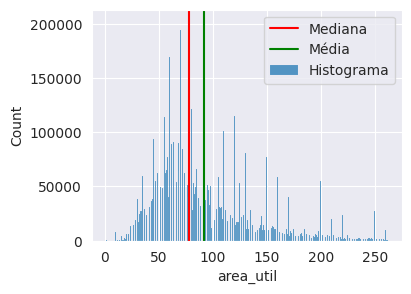

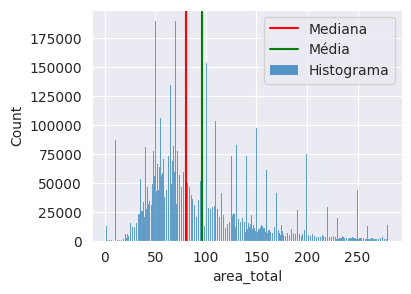

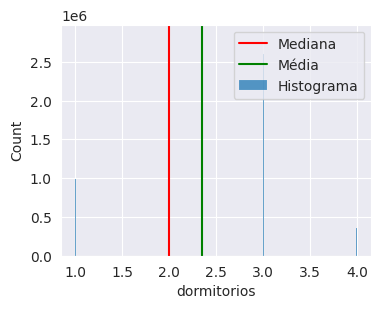

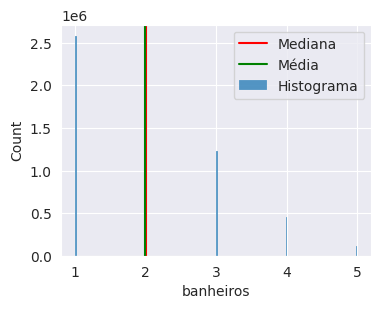

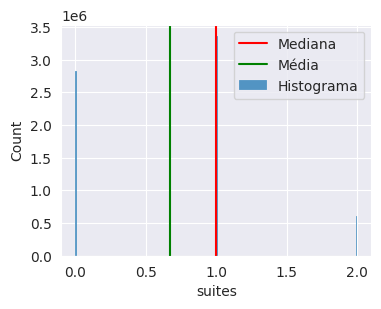

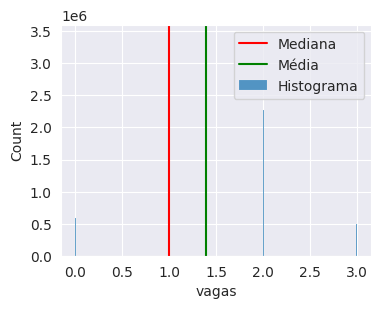

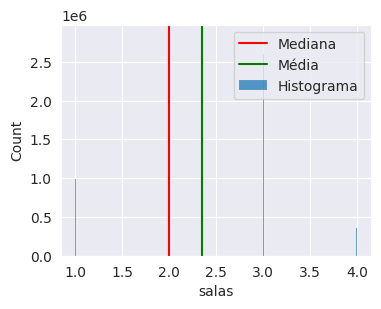

In [13]:
sns.set_style("darkgrid")

for col in num_cols:
    fig, axs = plt.subplots(figsize=(4, 3))
    dataplot = df.loc[df[col] <= df[col].quantile(0.99), col]
    med = dataplot.median()
    mean = dataplot.mean()
    sns.histplot(dataplot, ax=axs, label="Histograma")
    axs.axvline(med, color="red", label="Mediana")
    axs.axvline(mean, color="green", label="Média")
    plt.legend()
    plt.show()

In [14]:
df.dtypes

endereco                 object
numero_char              object
shp_municipio            object
shp_bairro_distrito      object
shp_microarea            object
tipo_transacao           object
tipo_imovel              object
area_util               float64
dormitorios               int64
suites                    int64
banheiros                 int64
vagas                   float64
area_total              float64
ano_construcao          float64
salas                   float64
preco_imovel_mediana    float64
Mes                     float64
dtype: object

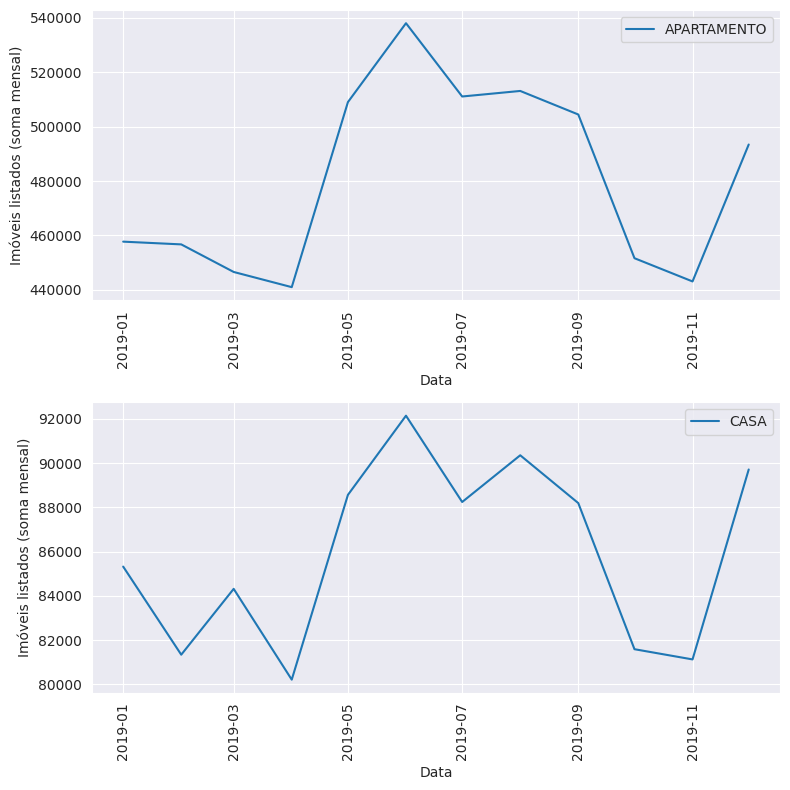

In [15]:
monthly_df = (
    df.groupby(by=["Mes", "tipo_imovel"]).count()[["tipo_transacao"]].reset_index()
)
monthly_df.loc[:, "date"] = pd.to_datetime(
    {"year": 2019, "month": monthly_df["Mes"], "day": 1}
)
monthly_df = monthly_df.rename(columns={"tipo_transacao": "count"})
# monthly_df = monthly_df.set_index("date")


fig, axs = plt.subplots(2, figsize=(8, 8))
xlabels = monthly_df["date"].dt.strftime("%Y-%m").unique()
for i, tipo in enumerate(monthly_df["tipo_imovel"].unique()):
    sns.lineplot(
        data=monthly_df.loc[monthly_df["tipo_imovel"] == tipo],
        y="count",
        x="date",
        label=tipo,
        ax=axs[i],
    )
    axs[i].legend()
    axs[i].set_xlabel("Data")
    axs[i].set_ylabel("Imóveis listados (soma mensal)")
    axs[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [16]:
df.loc[:, "preco_por_m2"] = df.loc[:, "preco_imovel_mediana"] / df.loc[:, "area_util"]

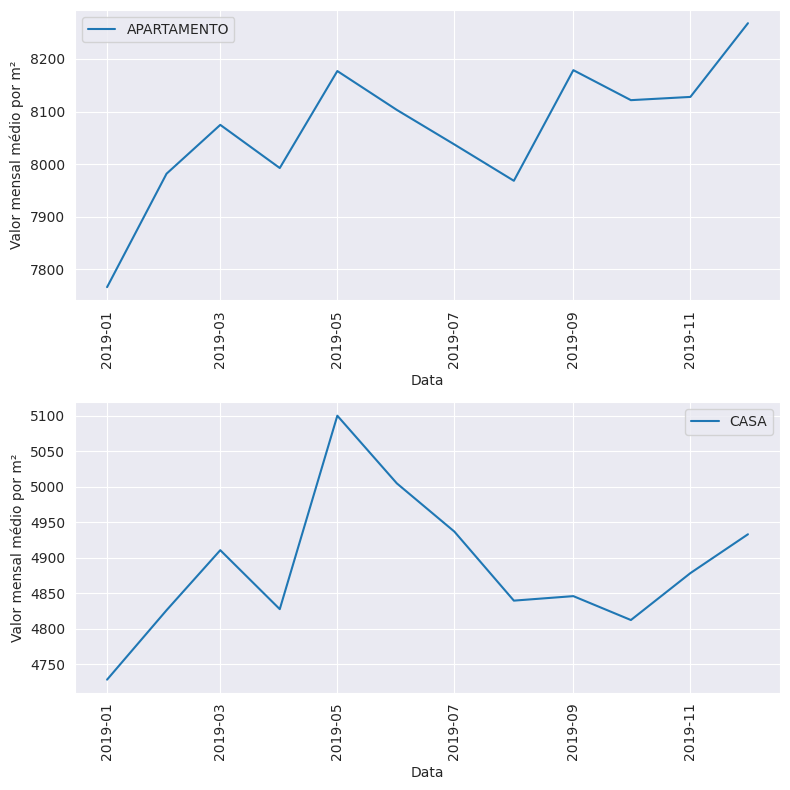

In [17]:
aux = df[["Mes", "tipo_imovel", "preco_por_m2"]].replace({
    np.inf: np.NaN, 
    -np.inf: np.NaN
}).dropna()

monthly_df = (
    aux.groupby(by=["Mes", "tipo_imovel"]).mean()[["preco_por_m2"]].reset_index()
)
monthly_df.loc[:, "date"] = pd.to_datetime(
    {"year": 2019, "month": monthly_df["Mes"], "day": 1}
)
monthly_df = monthly_df.rename(columns={"preco_por_m2": "mean"})
# monthly_df = monthly_df.set_index("date")


fig, axs = plt.subplots(2, figsize=(8, 8))
xlabels = monthly_df["date"].dt.strftime("%Y-%m").unique()
for i, tipo in enumerate(monthly_df["tipo_imovel"].unique()):
    sns.lineplot(
        data=monthly_df.loc[monthly_df["tipo_imovel"] == tipo],
        y="mean",
        x="date",
        label=tipo,
        ax=axs[i],
    )
    axs[i].legend()
    axs[i].set_xlabel("Data")
    axs[i].set_ylabel("Valor mensal médio por m²")
    axs[i].tick_params(axis="x", labelrotation=90)

plt.tight_layout()
plt.savefig("images/valor_por_mes.png")
plt.show()

In [18]:
df.head()

,endereco,numero_char,shp_municipio,shp_bairro_distrito,shp_microarea,tipo_transacao,tipo_imovel,area_util,dormitorios,suites,banheiros,vagas,area_total,ano_construcao,salas,preco_imovel_mediana,Mes,preco_por_m2
0,RUA VERGUEIRO,266,São Paulo,Liberdade,Liberdade,VENDA,APARTAMENTO,76.0,2,1,2,1.0,76.0,1975.0,2.0,930000.0,9.0,12236.842105
1,RUA DIOGO PEREIRA,297,São Paulo,Vl Sonia,Portal do Morumbi,VENDA,APARTAMENTO,65.0,2,1,1,2.0,65.0,1995.0,2.0,320000.0,12.0,4923.076923
2,RUA POUSADA DE SARAMAGOS,25,São Paulo,Cachoeirinha,Basileia,VENDA,CASA,125.0,3,1,2,2.0,125.0,2006.0,3.0,695000.0,3.0,5560.000000
4,ALAMEDA TIETE,588,São Paulo,Jd Paulista,Cerqueira Cesar,VENDA,APARTAMENTO,166.0,2,2,2,2.0,166.0,1976.0,2.0,2750000.0,12.0,16566.265060
5,RUA ARAGAO,21,São Paulo,Vl Mariana,Santa Cruz,LOCACAO,APARTAMENTO,57.0,2,1,1,1.0,57.0,2000.0,2.0,2500.0,5.0,43.859649


/tmp/ipykernel_25715/1309659027.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()[["preco_por_m2"]]


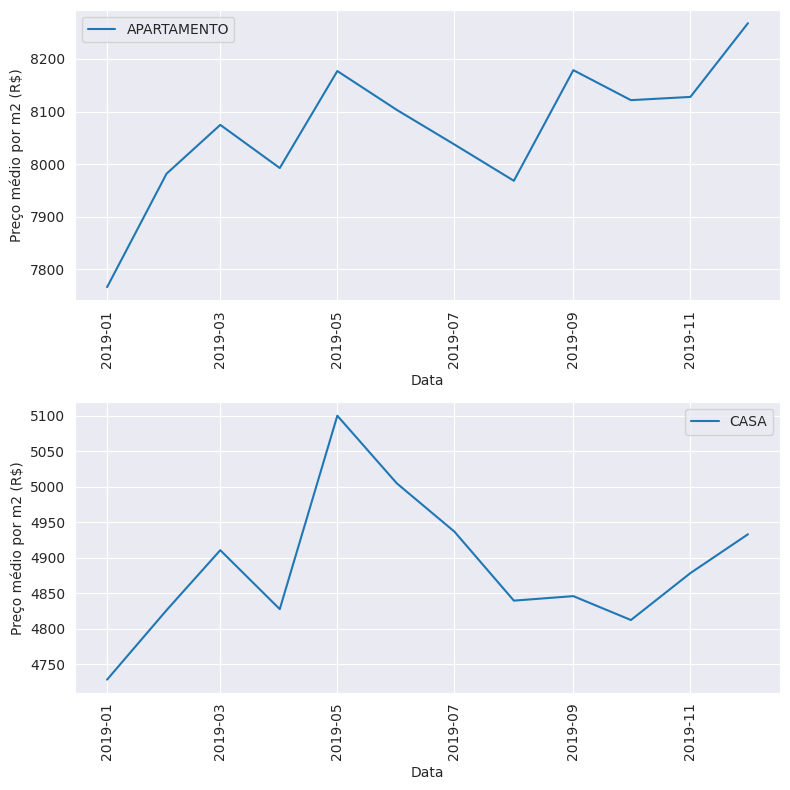

In [19]:
monthly_df = (
    df.replace({np.inf: np.NaN})
    .dropna(subset=["preco_por_m2"])
    .groupby(by=["Mes", "tipo_imovel"])
    .mean()[["preco_por_m2"]]
    .reset_index()
)
monthly_df.loc[:, "date"] = pd.to_datetime(
    {"year": 2019, "month": monthly_df["Mes"], "day": 1}
)
monthly_df = monthly_df.rename(columns={"preco_por_m2": "mean"})
# monthly_df = monthly_df.set_index("date")


fig, axs = plt.subplots(2, figsize=(8, 8))
xlabels = monthly_df["date"].dt.strftime("%Y-%m").unique()
for i, tipo in enumerate(monthly_df["tipo_imovel"].unique()):
    sns.lineplot(
        data=monthly_df.loc[monthly_df["tipo_imovel"] == tipo],
        y="mean",
        x="date",
        label=tipo,
        ax=axs[i],
    )
    axs[i].legend()
    axs[i].set_xlabel("Data")
    axs[i].set_ylabel("Preço médio por m2 (R$)")
    axs[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['endereco', 'numero_char', 'shp_municipio', 'shp_bairro_distrito',
       'shp_microarea', 'tipo_transacao', 'tipo_imovel', 'area_util',
       'dormitorios', 'suites', 'banheiros', 'vagas', 'area_total',
       'ano_construcao', 'salas', 'preco_imovel_mediana', 'Mes',
       'preco_por_m2'],
      dtype='object')

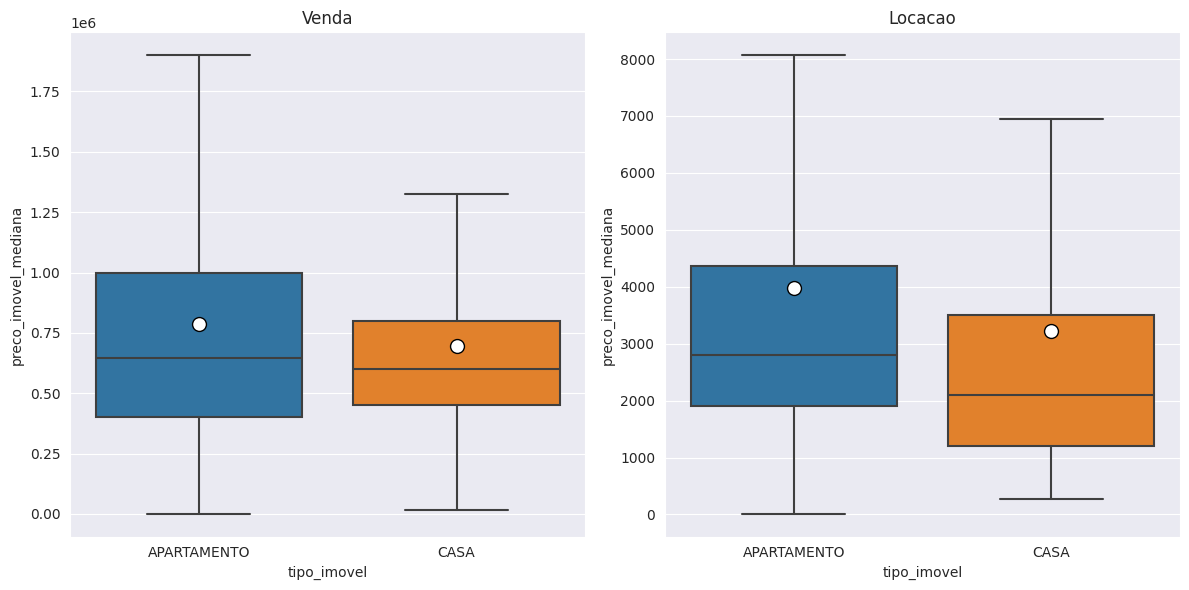

In [21]:
cat_cols = [
    "tipo_imovel",
]
transacoes = ["VENDA", "LOCACAO"]
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].set_title("Venda")
axs[1].set_title("Locacao")
for idx, transacao in enumerate(transacoes):
    dataplot = df.loc[
        (df["preco_imovel_mediana"] <= df["preco_imovel_mediana"].quantile(0.99))
        & (df["tipo_transacao"] == transacao),
        ["tipo_imovel", "preco_imovel_mediana"],
    ]
    sns.boxplot(
        x="tipo_imovel",
        y="preco_imovel_mediana",
        data=dataplot,
        showfliers=False,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "white",
            "markeredgecolor": "black",
            "markersize": "10",
        },
        ax=axs[idx]
    )
plt.tight_layout()
plt.savefig("images/boxplot_preco.png")
plt.show()


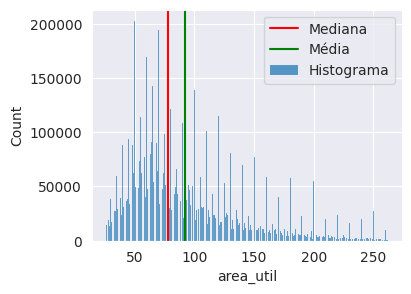

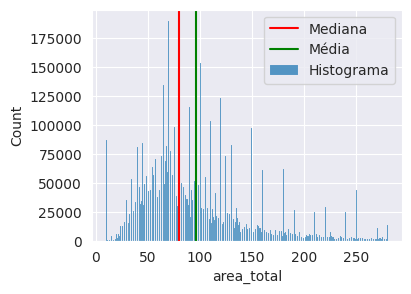

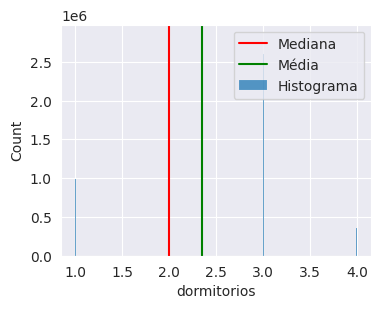

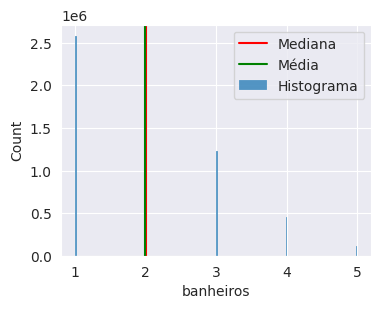

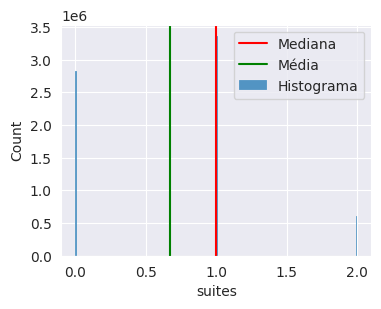

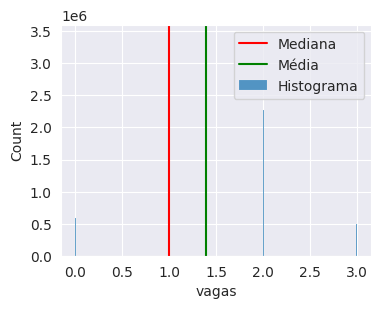

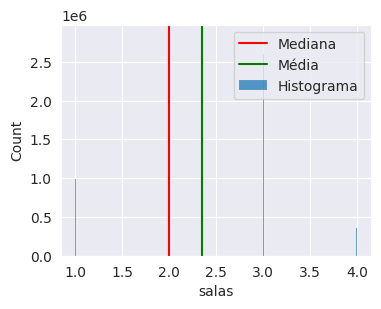

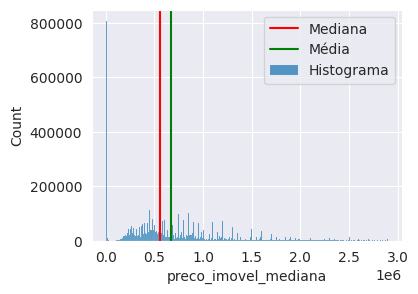

In [23]:
num_cols = [
    "area_util",
    "area_total",
    "dormitorios",
    "banheiros",
    "suites",
    "vagas",
    "salas",
    "preco_imovel_mediana",
]
sns.set_style("darkgrid")
threshold = 0.99
for col in num_cols:
    fig, axs = plt.subplots(figsize=(4, 3))
    dataplot = df.loc[
        (df[col] <= df[col].quantile(threshold))
        & (df[col] >= df[col].quantile(1 - threshold)),
        col,
    ]
    med = dataplot.median()
    mean = dataplot.mean()
    sns.histplot(dataplot, ax=axs, label="Histograma")
    axs.axvline(med, color="red", label="Mediana")
    axs.axvline(mean, color="green", label="Média")
    plt.legend()
    plt.show()

In [24]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[num_cols].describe()

,area_util,area_total,dormitorios,banheiros,suites,vagas,salas,preco_imovel_mediana
count,6796894.00,6796894.00,6796894.00,6796894.00,6796894.00,6796894.00,6796894.00,6796894.00
mean,93.63,97.77,2.34,1.98,0.67,1.39,2.34,702724.76
std,51.35,56.39,0.79,0.99,0.63,0.75,0.79,2005337.88
min,1.00,1.00,1.00,1.00,0.00,0.00,1.00,13.64
25%,57.00,59.00,2.00,1.00,0.00,1.00,2.00,319150.00
50%,78.00,81.00,2.00,2.00,1.00,1.00,2.00,554000.00
75%,118.00,125.00,3.00,3.00,1.00,2.00,3.00,900000.00
max,331.00,309.00,4.00,5.00,2.00,3.00,4.00,1395000000.00


In [25]:
micros = df["shp_microarea"].unique()
micros.sort()
print(micros.tolist())

['Aclimação', 'Aeroporto', 'Alto da Lapa', 'Alto de Pinheiros', 'Anhanguera', 'Anália Franco', 'Aricanduva', 'Arthur Alvim', 'Barra Funda', 'Basileia', 'Bela Vista', 'Belém', 'Bexiga', 'Bom Retiro', 'Bosque da Saúde', 'Brasilândia', 'Brooklin', 'Brás', 'Cachoeirinha', 'Cambuci', 'Campo Belo', 'Campo Grande', 'Campo Limpo', 'Campos Elíseos', 'Cangaíba', 'Cantareira', 'Capão Redondo', 'Carrão', 'Casa Grande', 'Casa Verde', 'Ceasa', 'Cenesp', 'Cerqueira Cesar', 'Chácara Flora', 'Chácara Klabin', 'Chácara Santo Antônio', 'Cidade A E Carvalho', 'Cidade Ademar', 'Cidade Dutra', 'Cidade Jardim', 'Cidade Líder', 'Cidade Tiradentes', 'Cidade Universitária', 'Cocaia', 'Consolação', 'Cupecê', 'Ermelino Matarazzo', 'Fazenda São Juta', 'Freguesia do Ó', 'Grajaú', 'Guaianases', 'Guarapiranga', 'Higienópolis', 'Iguatemi', 'Indianópolis', 'Interlagos', 'Ipiranga', 'Itaim Bibi', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaguaré', 'Jaraguá', 'Jardim Albano', 'Jardim Arpoador', 'Jardim Bonfigliori', 'J

In [26]:
bairros = df["shp_bairro_distrito"].unique().astype(str)
bairros.sort()
print(bairros.tolist())

['Alto de Pinheiros', 'Anhanguera', 'Aricanduva', 'Artur Alvim', 'Barra Funda', 'Bela Vista', 'Belém', 'Bom Retiro', 'Brasilândia', 'Brás', 'Butantã', 'Cachoeirinha', 'Cambuci', 'Campo Belo', 'Campo Grande', 'Campo Limpo', 'Cangaíba', 'Capão Redondo', 'Carrão', 'Casa Verde', 'Cidade Ademar', 'Cidade Dutra', 'Cidade Líder', 'Cidade Tiradentes', 'Consolação', 'Cursino', 'Ermelino Matarazzo', 'Freguesia do Ó', 'Grajaú', 'Guaianases', 'Iguatemi', 'Ipiranga', 'Itaim Bibi', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaguaré', 'Jaraguá', 'Jaçana', 'Jd Helena', 'Jd Paulista', 'Jd São Luis', 'Jd Ângela', 'José Bonifacio', 'Jáguara', 'Lajeado', 'Lapa', 'Liberdade', 'Limão', 'Mandaqui', 'Marsilac', 'Moema', 'Mooca', 'Morumbi', 'Parelheiros', 'Pari', 'Parque do Carmo', 'Pedreira', 'Penha', 'Perdizes', 'Perus', 'Pinheiros', 'Pirituba', 'Ponte Rasa', 'Raposo Tavares', 'República', 'Rio Pequeno', 'Sacomã', 'Santa Cecília', 'Santana', 'Santo Amaro', 'Sapopemba', 'Saúde', 'Socorro', 'São Domingos', 'S

In [27]:
df.head()

,endereco,numero_char,shp_municipio,shp_bairro_distrito,shp_microarea,tipo_transacao,tipo_imovel,area_util,dormitorios,suites,banheiros,vagas,area_total,ano_construcao,salas,preco_imovel_mediana,Mes,preco_por_m2
0,RUA VERGUEIRO,266,São Paulo,Liberdade,Liberdade,VENDA,APARTAMENTO,76.00,2,1,2,1.00,76.00,1975.00,2.00,930000.00,9.00,12236.84
1,RUA DIOGO PEREIRA,297,São Paulo,Vl Sonia,Portal do Morumbi,VENDA,APARTAMENTO,65.00,2,1,1,2.00,65.00,1995.00,2.00,320000.00,12.00,4923.08
2,RUA POUSADA DE SARAMAGOS,25,São Paulo,Cachoeirinha,Basileia,VENDA,CASA,125.00,3,1,2,2.00,125.00,2006.00,3.00,695000.00,3.00,5560.00
4,ALAMEDA TIETE,588,São Paulo,Jd Paulista,Cerqueira Cesar,VENDA,APARTAMENTO,166.00,2,2,2,2.00,166.00,1976.00,2.00,2750000.00,12.00,16566.27
5,RUA ARAGAO,21,São Paulo,Vl Mariana,Santa Cruz,LOCACAO,APARTAMENTO,57.00,2,1,1,1.00,57.00,2000.00,2.00,2500.00,5.00,43.86


In [28]:
# df[["tipo_imovel", "preco_imovel_mediana", "preco_por_m2"]]
aux = df[["tipo_transacao", "preco_imovel_mediana", "preco_por_m2"]].replace({
    np.inf: np.NaN, 
    -np.inf: np.NaN
}).dropna()

df_venda = aux.loc[
    aux.loc[:,"tipo_transacao"] == "VENDA",
    ["preco_imovel_mediana", "preco_por_m2"]
]
df_locacao = aux.loc[
    df.loc[:,"tipo_transacao"] == "LOCACAO",
    ["preco_imovel_mediana", "preco_por_m2"]
]
df_venda = df_venda.describe().rename(columns={
    i:i+"_venda" for i in df_venda.columns
})
df_locacao = df_locacao.describe().rename(columns={
    i:i+"_locacao" for i in df_locacao.columns
})


In [29]:
df_venda.join(
    df_locacao,
    # how="left",
    # on="index"
)

,preco_imovel_mediana_venda,preco_por_m2_venda,preco_imovel_mediana_locacao,preco_por_m2_locacao
count,5843393.00,5843393.00,953501.00,953501.00
mean,816757.80,8815.98,3889.77,52.02
std,2141224.47,25276.30,14938.83,224.09
min,1100.00,52.38,13.64,0.32
25%,415000.00,5747.13,1800.00,28.00
50%,640000.00,7786.89,2754.84,39.68
75%,989000.00,10608.74,4200.00,58.18
max,1395000000.00,18355263.16,1300000.00,32692.31


In [30]:
df_locacao = df.loc[
    df.loc[:,"tipo_transacao"] == "LOCACAO",
    :
]
df_venda = df.loc[
    df.loc[:,"tipo_transacao"] == "VENDA",
    :
]


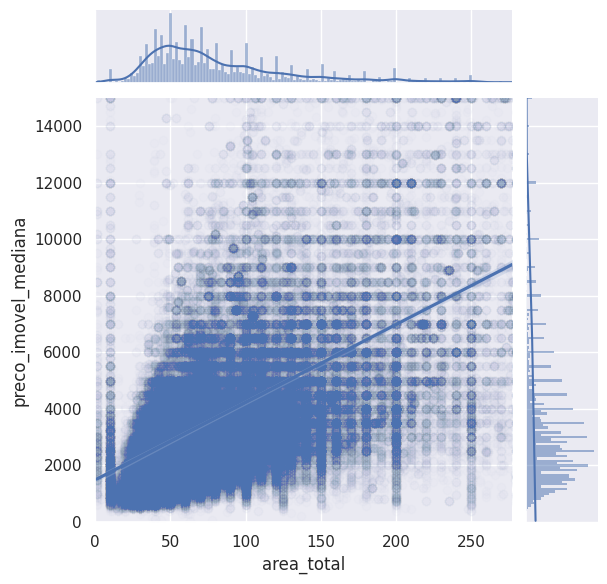

In [36]:
sns.set_style("darkgrid")
dataplot = df_locacao[["area_total", "preco_imovel_mediana"]]
g = sns.jointplot(
    dataplot.sample(round(len(dataplot)/5)),
    x="area_total",
    y="preco_imovel_mediana",
    kind="reg",
    scatter_kws={"alpha": 0.01},
)

# g.plot_joint(sns.kdeplot, color="darkblue", zorder=0, levels=6, alpha=0.5)
plt.xlim(0, dataplot["area_total"].quantile(0.99))
plt.ylim(0, dataplot["preco_imovel_mediana"].quantile(0.99))
plt.savefig("images/scatter_reg_locacao.png")
plt.show()

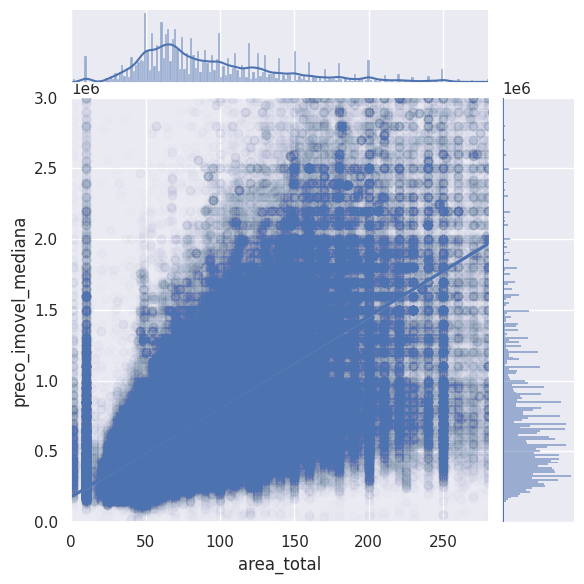

In [37]:
sns.set_style("darkgrid")
dataplot = df_venda[["area_total", "preco_imovel_mediana"]]
g = sns.jointplot(
    dataplot.sample(round(len(dataplot)/10)),
    x="area_total",
    y="preco_imovel_mediana",
    kind="reg",
    scatter_kws={"alpha": 0.01},
)

# g.plot_joint(sns.kdeplot, color="darkblue", zorder=0, levels=6, alpha=0.5)
plt.xlim(0, dataplot["area_total"].quantile(0.99))
plt.ylim(0, dataplot["preco_imovel_mediana"].quantile(0.99))
plt.savefig("images/scatter_reg_venda.png")
plt.show()

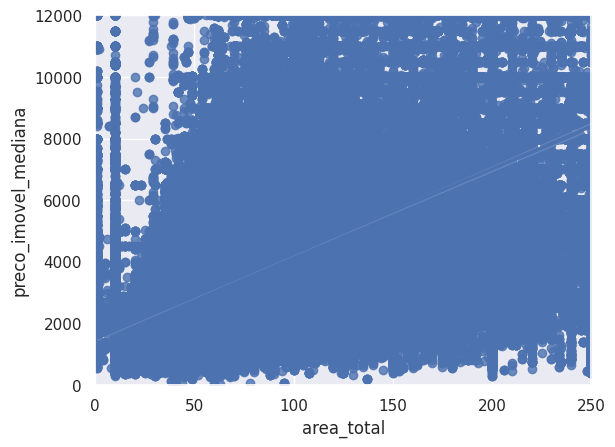

slope: 27.62249998005025
 intercept: 1492.25821461754
 r: 0.9999999999999996
 p: 0.0
 sterr: 8.315723729652512e-08



In [39]:
import scipy

dataplot= df_locacao.copy()
g=sns.regplot(
    dataplot,
    x="area_total",
    y="preco_imovel_mediana",
    # kind="reg",
    # scatter_kws={"alpha": 0.03},
)
plt.xlim(0, dataplot["area_total"].quantile(0.98))
plt.ylim(0, dataplot["preco_imovel_mediana"].quantile(0.98))
slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                       y=g.get_lines()[0].get_ydata())
plt.show()
plt.close()
print(
    f"slope: {slope}\n",
    f"intercept: {intercept}\n",
    f"r: {r}\n",
    f"p: {p}\n",
    f"sterr: {sterr}\n"
)


In [43]:
df_venda[["preco_imovel_mediana","area_total"]].corr()

,preco_imovel_mediana,area_total
preco_imovel_mediana,1.00,0.17
area_total,0.17,1.00


In [ ]:
sum(df["preco_imovel_mediana"]==0)

0

In [ ]:
df_locacao

,endereco,numero_char,shp_municipio,shp_bairro_distrito,shp_microarea,tipo_transacao,tipo_imovel,area_util,dormitorios,suites,banheiros,vagas,area_total,ano_construcao,salas,preco_imovel_mediana,Mes,preco_por_m2
5,RUA ARAGAO,21,São Paulo,Vl Mariana,Santa Cruz,LOCACAO,APARTAMENTO,57.00,2,1,1,1.00,57.00,2000.00,2.00,2500.00,5.00,43.86
15,RUA GOMES DE CARVALHO,968,São Paulo,Itaim Bibi,Vila Olimpia,LOCACAO,APARTAMENTO,65.00,2,0,1,1.00,77.00,1977.00,2.00,2700.00,4.00,41.54
19,AVENIDA RAIMUNDO PEREIRA DE MAGALHAES,909,São Paulo,Lapa,Lapa de Baixo,LOCACAO,APARTAMENTO,56.00,2,0,1,1.00,56.00,2015.00,2.00,2800.00,4.00,50.00
23,RUA MOURA,81,São Paulo,Limão,Limão,LOCACAO,APARTAMENTO,105.00,3,2,1,2.00,125.00,2003.00,3.00,1800.00,2.00,17.14
33,RUA TUCUNA,908,São Paulo,Perdizes,Pompéia,LOCACAO,APARTAMENTO,60.00,1,1,1,1.00,60.00,1996.00,1.00,2600.00,9.00,43.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827087,RUA MIGUEL,NaN,São Paulo,Bela Vista,Consolação,LOCACAO,APARTAMENTO,45.00,1,0,1,1.00,45.00,1979.00,1.00,1500.00,3.00,33.33
9827089,RUA GUARARAPES,228,São Paulo,Itaim Bibi,Brooklin,LOCACAO,APARTAMENTO,50.00,1,1,2,1.00,50.00,1996.00,1.00,3200.00,7.00,64.00
9827093,RUA BAHIA,543,São Paulo,Consolação,Higienópolis,LOCACAO,APARTAMENTO,160.00,3,1,4,2.00,160.00,1985.00,3.00,10500.00,8.00,65.62
9827095,AVENIDA DE SAO VICENTE,NaN,São Paulo,Barra Funda,Barra Funda,LOCACAO,APARTAMENTO,70.00,2,1,3,2.00,70.00,2019.00,2.00,2600.00,6.00,37.14


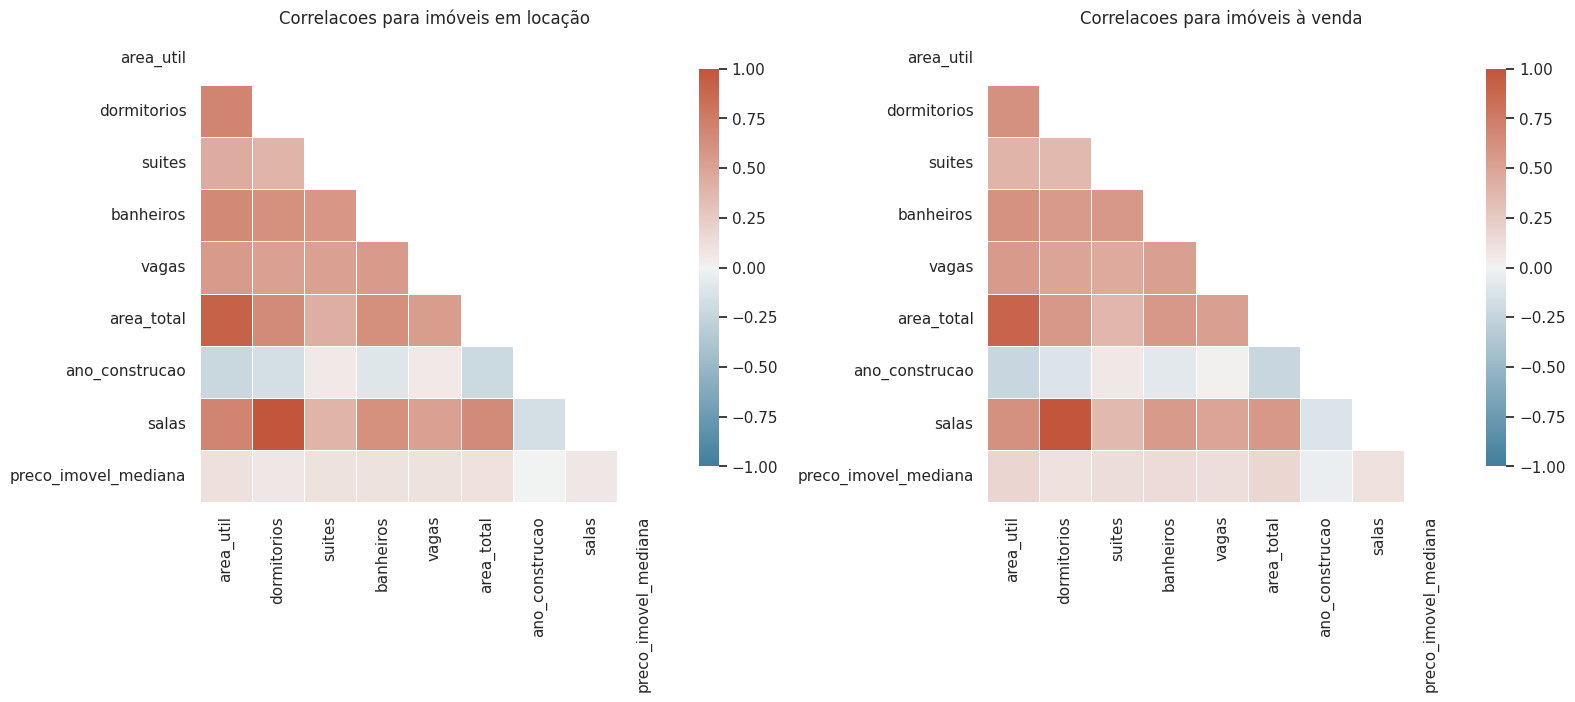

In [45]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix

# Generate a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set up the matplotlib figure
f, axs = plt.subplots(1,2, figsize=(16, 9))
corr = df_locacao.drop(columns=["Mes","preco_por_m2"]).corr(
    method="pearson",
    numeric_only=True
)
mask = np.triu(np.ones_like(corr, dtype=bool))
axs[0].set_title("Correlacoes para imóveis em locação")


# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0])

corr = df_venda.drop(columns=["Mes","preco_por_m2"]).corr(
    method="pearson",
    numeric_only=True
)
mask = np.triu(np.ones_like(corr, dtype=bool))
axs[1].set_title("Correlacoes para imóveis à venda")
# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[1])
plt.tight_layout()
plt.savefig("images/corr_matrix.png")
plt.show()

In [ ]:
cat_cols = [
    "shp_municipio",
    "shp_bairro_distrito",
    "shp_microarea",
    "tipo_imovel",
]
num_cols = [
    "dormitorios",
    "suites",
    "banheiros",
    "vagas",
    "salas",
]

target = "preco_por_m2"

In [ ]:
df.columns

Index(['endereco', 'numero_char', 'shp_municipio', 'shp_bairro_distrito',
       'shp_microarea', 'tipo_transacao', 'tipo_imovel', 'area_util',
       'dormitorios', 'suites', 'banheiros', 'vagas', 'area_total',
       'ano_construcao', 'salas', 'preco_imovel_mediana', 'Mes',
       'preco_por_m2'],
      dtype='object')